In [1]:
import numpy as np
import numpy.ma as ma
import cv2
from DAB_Analysis_Functions import DAB
DAB_A = DAB()

In [2]:
img = cv2.imread('Example_Image.tif')
RGBimage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
lab_Image = cv2.cvtColor(DAB_A.im2double(RGBimage), cv2.COLOR_RGB2LAB)

In [4]:
default_asyn_params = np.array([38.35, 27.75, 24.9, 15])
default_cell_params = np.array([75.4, 5.5, -3.4, 6])

image_mask_asyn, asyn_params = DAB_A.colourFilterLab(lab_Image, default_asyn_params)
image_mask_nuclei, asyn_params = DAB_A.colourFilterLab(lab_Image, default_cell_params, rate=[1,2])


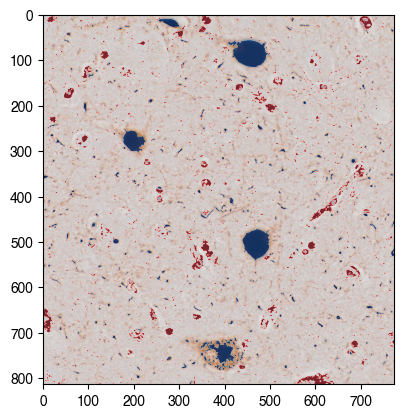

In [13]:
import matplotlib.pyplot as plt
plt.imshow(RGBimage) # I would add interpolation='none'
plt.imshow(image_mask_asyn, cmap='Blues', alpha=0.8*(image_mask_asyn>0)) # interpolation='none'
plt.imshow(image_mask_nuclei, cmap='Reds', alpha=0.8*(image_mask_nuclei>0)) # interpolation='none'